# <center>Laboratorium 5<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [1]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

***Zadanie 1.***  
Zaimplementuj interpolacje pierwszego stopnia. Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji liniowych w poszczególnych przedziałach.

***Podpowiedź***

poszczególne współczynniki przyjmują wartość:

$ a=\frac{y_{k+1}-y_k}{x_{k+1}-x_k}$

$ b=y-a*x_0$

***Przykład***


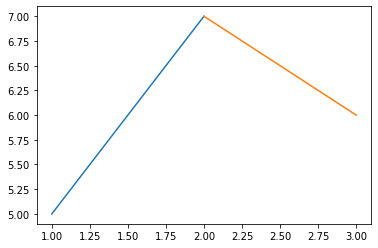

In [2]:
x=np.array([1,2,3])
y=np.array([5,7,6])

a,b=main.first_spline(x,y)
f = [[b[i],a[i]] for i in range(len(a))]

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]))

***Zadanie 2.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


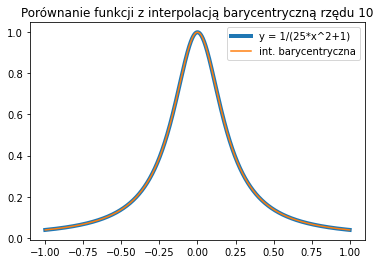

Jakość interpolacji przedstawia wartość normy, która dla powyższego sposobu wynosi:  2.255897579850341e-09 , przy rzędzie interpolacji wynoszącym 100


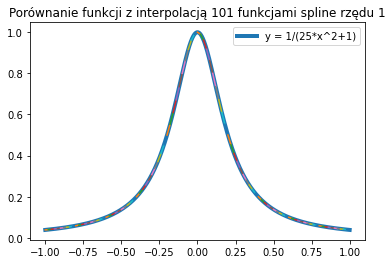

10000
Jakość interpolacji przedstawia wartość normy, która dla powyższego sposobu wynosi:  0.002456229746727878 , przy rzędzie interpolacji wynoszącym 101


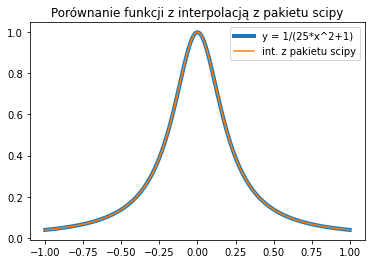

Jakość interpolacji przedstawia wartość normy, która dla powyższego sposobu wynosi:  4.440892098500626e-16 , przy rzędzie interpolacji wynoszącym 10000


In [3]:
import interpolate as imp

fun1 = lambda x: 1/(25*x**2+1)
x = np.linspace(-1, 1, 10000)
y = fun1(x)


# Interpolacja barycentryczna

n = 100  # STOPIEŃ PRZYBLIŻENIA
nodes = imp.chebyshev_nodes(n)
yimp = imp.barycentric_inte(nodes, fun1(nodes), imp.bar_czeb_weights(n), x)

plt.figure()
plt.plot(x, y, linewidth=4, label='y = 1/(25*x^2+1)')
plt.plot(x, yimp, label='int. barycentryczna')
plt.title('Porównanie funkcji z interpolacją barycentryczną rzędu 10')
plt.legend()
plt.show()

quality = imp.L_inf(y, yimp)
print('Jakość interpolacji przedstawia wartość normy, która dla powyższego sposobu wynosi: ', quality,\
      ', przy rzędzie interpolacji wynoszącym 100')


# Interpolacja funkcją spline 1-go stopnia

x_1 = np.linspace(-1, 1, 101)
y_1 = np.array(fun1(x_1))

a, b = main.first_spline(x_1, y_1)
f = [[b[i], a[i]] for i in range(len(a))]
y_new_list = []

plt.figure()
plt.plot(x, y, linewidth=4, label='y = 1/(25*x^2+1)')
for i in range(len(x_1)-1):
    x_new = np.linspace(x_1[i], x_1[i+1], 100)
    y_new = PolyCoefficients(x_new, f[i])
    y_new_list.extend(y_new)
    plt.plot(x_new, y_new)

plt.title('Porównanie funkcji z interpolacją 101 funkcjami spline rzędu 1')
plt.legend()
plt.show()
print(len(y_new_list))
quality = imp.L_inf(y, y_new_list)
print('Jakość interpolacji przedstawia wartość normy, która dla powyższego sposobu wynosi: ', quality,\
      ', przy rzędzie interpolacji wynoszącym 101')


# Interpolacja funkcją interpolate.splprep z pakietu scipy

from scipy.interpolate import splprep, splev

x_1 = np.linspace(-1, 1, 10000)
y_1 = np.array(fun1(x_1))
tck, u = splprep([x_1, y_1], s=0)
new_points = splev(u, tck)

plt.figure()
plt.plot(x, y, linewidth=4, label='y = 1/(25*x^2+1)')
plt.plot(new_points[0], new_points[1], label='int. z pakietu scipy')
plt.title('Porównanie funkcji z interpolacją z pakietu scipy')
plt.legend()
plt.show()

quality = imp.L_inf(y, new_points[1])
print('Jakość interpolacji przedstawia wartość normy, która dla powyższego sposobu wynosi: ', quality,\
      ', przy rzędzie interpolacji wynoszącym 10000')

***Zadanie 3.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


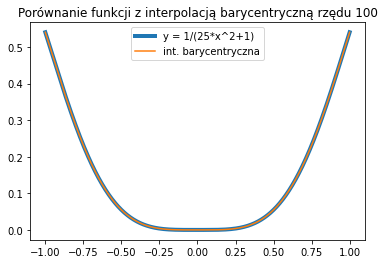

Jakość interpolacji przedstawia wartość normy, która dla powyższego sposobu wynosi:  2.3293429352033712e-08 , przy rzędzie interpolacji wynoszącym 100


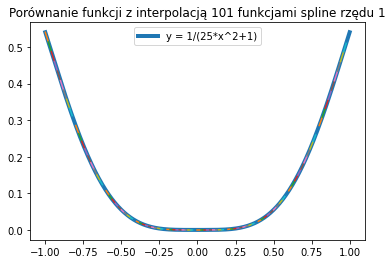

10000
Jakość interpolacji przedstawia wartość normy, która dla powyższego sposobu wynosi:  0.00026356471031008244 , przy rzędzie interpolacji wynoszącym 101


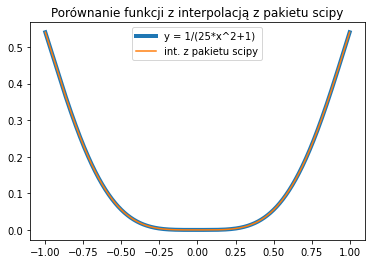

Jakość interpolacji przedstawia wartość normy, która dla powyższego sposobu wynosi:  3.3306690738754696e-16 , przy rzędzie interpolacji wynoszącym 10000


In [4]:
fun2 = lambda x: np.cos(x)*x**4
x = np.linspace(-1, 1, 10000)
y = fun2(x)

# Interpolacja barycentryczna

n = 10  # STOPIEŃ PRZYBLIŻENIA
nodes = imp.chebyshev_nodes(n)
yimp = imp.barycentric_inte(nodes, fun2(nodes), imp.bar_czeb_weights(n), x)

plt.figure()
plt.plot(x, y, linewidth=4, label='y = 1/(25*x^2+1)')
plt.plot(x, yimp, label='int. barycentryczna')
plt.title('Porównanie funkcji z interpolacją barycentryczną rzędu 100')
plt.legend()
plt.show()

quality = imp.L_inf(y, yimp)
print('Jakość interpolacji przedstawia wartość normy, która dla powyższego sposobu wynosi: ', quality,\
      ', przy rzędzie interpolacji wynoszącym 100')


# Interpolacja funkcją spline 1-go stopnia

x_1 = np.linspace(-1, 1, 101)
y_1 = np.array(fun2(x_1))

a, b = main.first_spline(x_1, y_1)
f = [[b[i], a[i]] for i in range(len(a))]
y_new_list = []

plt.figure()
plt.plot(x, y, linewidth=4, label='y = 1/(25*x^2+1)')
for i in range(len(x_1)-1):
    x_new = np.linspace(x_1[i], x_1[i+1], 100)
    y_new = PolyCoefficients(x_new, f[i])
    y_new_list.extend(y_new)
    plt.plot(x_new, y_new)

plt.title('Porównanie funkcji z interpolacją 101 funkcjami spline rzędu 1')
plt.legend()
plt.show()
print(len(y_new_list))
quality = imp.L_inf(y, y_new_list)
print('Jakość interpolacji przedstawia wartość normy, która dla powyższego sposobu wynosi: ', quality,\
      ', przy rzędzie interpolacji wynoszącym 101')


# Interpolacja funkcją interpolate.splprep z pakietu scipy

from scipy.interpolate import splprep, splev

x_1 = np.linspace(-1, 1, 10000)
y_1 = np.array(fun2(x_1))
tck, u = splprep([x_1, y_1], s=0)
new_points = splev(u, tck)

plt.figure()
plt.plot(x, y, linewidth=4, label='y = 1/(25*x^2+1)')
plt.plot(new_points[0], new_points[1], label='int. z pakietu scipy')
plt.title('Porównanie funkcji z interpolacją z pakietu scipy')
plt.legend()
plt.show()

quality = imp.L_inf(y, new_points[1])
print('Jakość interpolacji przedstawia wartość normy, która dla powyższego sposobu wynosi: ', quality,\
      ', przy rzędzie interpolacji wynoszącym 10000')

***Zadanie 4.***  
Zaimplementuj funkcję interpolującą sklejaną trzeciego rzędu (splajn kubiczny). Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji wielomianowych w poszczególnych przedziałach.

***Podpowiedź***

https://medium.com/eatpredlove/natural-cubic-splines-implementation-with-python-edf68feb57aa



***Zadania 5.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


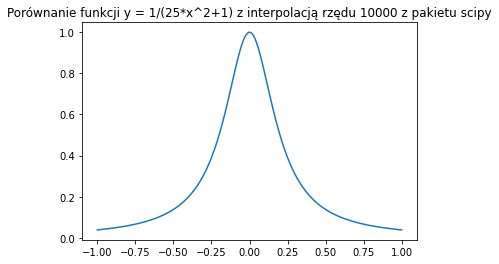

Jakość interpolacji przedstawia wartość normy, która dla powyższego sposobu wynosi:  4.440892098500626e-16 , przy rzędzie interpolacji wynoszącym 10000


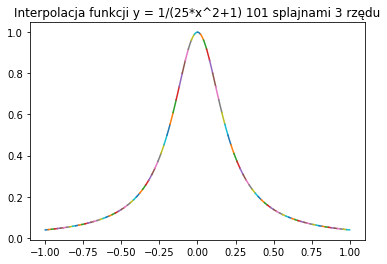

Jakość interpolacji przedstawia wartość normy, która dla powyższego sposobu wynosi:  0.00036334808075499936 , przy rzędzie interpolacji wynoszącym 101


In [5]:
# Interpolacja funkcją interpolate.splprep z pakietu scipy

fun1 = lambda x: 1/(25*x**2+1)
x = np.linspace(-1, 1, 10000)
y = fun1(x)

x_1 = np.linspace(-1, 1, 10000)
y_1 = np.array(fun1(x_1))
tck, u = splprep([x_1, y_1], s=0)
new_points = splev(u, tck)

plt.figure()
plt.plot(new_points[0], new_points[1])
plt.title('Porównanie funkcji y = 1/(25*x^2+1) z interpolacją rzędu 10000 z pakietu scipy')
plt.show()

quality = imp.L_inf(y, new_points[1])
print('Jakość interpolacji przedstawia wartość normy, która dla powyższego sposobu wynosi: ', quality,\
      ', przy rzędzie interpolacji wynoszącym 10000')


# Interpolacja funkcją cubic_spline

x_1 = np.linspace(-1, 1, 101)
y_1 = np.array(fun1(x_1))
y_new_list = []

def PolyCoefficients2(x, x0, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*(x-x0)**i
    return y


b,c,d = main.cubic_spline(x_1,y_1)

f = [[y_1[i],b[i],c[i],d[i]] for i in range(len(b))]
for i in range(len(x_1)-1):
    x_new = np.linspace(x_1[i], x_1[i+1],100)
    y_new = PolyCoefficients2(x_new, x_1[i], f[i])
    plt.plot(x_new, y_new)
    y_new_list.extend(y_new)
    plt.title("Interpolacja funkcji y = 1/(25*x^2+1) 101 splajnami 3 rzędu")
plt.show()

quality = imp.L_inf(y, y_new_list)
print('Jakość interpolacji przedstawia wartość normy, która dla powyższego sposobu wynosi: ', quality,\
      ', przy rzędzie interpolacji wynoszącym 101')

***Zadanie 6.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


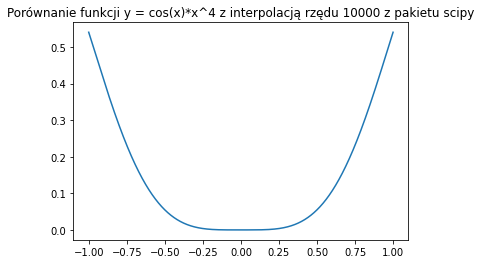

Jakość interpolacji przedstawia wartość normy, która dla powyższego sposobu wynosi:  3.3306690738754696e-16 , przy rzędzie interpolacji wynoszącym 10000


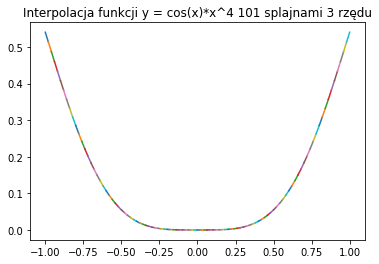

Jakość interpolacji przedstawia wartość normy, która dla powyższego sposobu wynosi:  0.0002635647103099714 , przy rzędzie interpolacji wynoszącym 101


In [6]:
# Interpolacja funkcją interpolate.splprep z pakietu scipy

fun2 = lambda x: np.cos(x)*x**4
x = np.linspace(-1, 1, 10000)
y = fun2(x)

x_1 = np.linspace(-1, 1, 10000)
y_1 = np.array(fun2(x_1))
tck, u = splprep([x_1, y_1], s=0)
new_points = splev(u, tck)

plt.figure()
plt.plot(new_points[0], new_points[1])
plt.title('Porównanie funkcji y = cos(x)*x^4 z interpolacją rzędu 10000 z pakietu scipy')
plt.show()

quality = imp.L_inf(y, new_points[1])
print('Jakość interpolacji przedstawia wartość normy, która dla powyższego sposobu wynosi: ', quality,\
      ', przy rzędzie interpolacji wynoszącym 10000')


# Interpolacja funkcją cubic_spline

x_1 = np.linspace(-1, 1, 101)
y_1 = np.array(fun2(x_1))
y_new_list = []

def PolyCoefficients2(x, x0, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*(x-x0)**i
    return y


b,c,d = main.cubic_spline(x_1,y_1)

f = [[y_1[i],b[i],c[i],d[i]] for i in range(len(b))]
for i in range(len(x_1)-1):
    x_new = np.linspace(x_1[i], x_1[i+1],100)
    y_new = PolyCoefficients2(x_new, x_1[i], f[i])
    plt.plot(x_new, y_new)
    y_new_list.extend(y_new)
    plt.title("Interpolacja funkcji y = cos(x)*x^4 101 splajnami 3 rzędu")
plt.show()

quality = imp.L_inf(y, y_new_list)
print('Jakość interpolacji przedstawia wartość normy, która dla powyższego sposobu wynosi: ', quality,\
      ', przy rzędzie interpolacji wynoszącym 101')

***Zadanie 7.***  
Dla funkcji:
### $f(x) = |sin(5x)|^3$

Porównać działanie funkcji zaimplementowanych w Zadaniu 1 oraz 4 oraz przedstawić wyniki na odpowiednich wykresach.

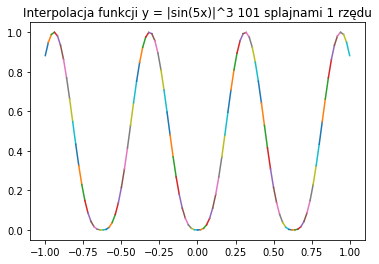

Jakość interpolacji przedstawia wartość normy, która dla powyższego sposobu wynosi:  0.0037809870695567627 , przy rzędzie interpolacji wynoszącym 101


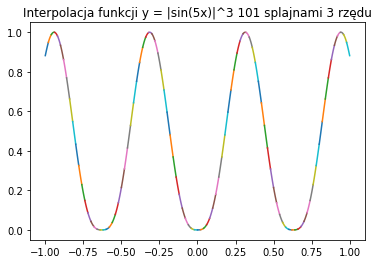

Jakość interpolacji przedstawia wartość normy, która dla powyższego sposobu wynosi:  0.001050842690572762 , przy rzędzie interpolacji wynoszącym 101


In [7]:
fun3 = lambda x: np.abs(np.sin(5*x))**3
x = np.linspace(-1, 1, 10000)
y = fun3(x)
x_1 = np.linspace(-1, 1, 101)
y_1 = np.array(fun3(x_1))


# Interpolacja funkcją spline 1-go stopnia

a, b = main.first_spline(x_1, y_1)
f = [[b[i], a[i]] for i in range(len(a))]
y_new_list = []

plt.figure()
for i in range(len(x_1)-1):
    x_new = np.linspace(x_1[i], x_1[i+1], 100)
    y_new = PolyCoefficients(x_new, f[i])
    y_new_list.extend(y_new)
    plt.plot(x_new, y_new)
plt.title('Interpolacja funkcji y = |sin(5x)|^3 101 splajnami 1 rzędu')
plt.show()

quality = imp.L_inf(y, y_new_list)
print('Jakość interpolacji przedstawia wartość normy, która dla powyższego sposobu wynosi: ', quality,\
      ', przy rzędzie interpolacji wynoszącym 101')


# Interpolacja funkcją cubic_spline

def PolyCoefficients2(x, x0, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*(x-x0)**i
    return y


b,c,d = main.cubic_spline(x_1,y_1)
y_new_list = []

f = [[y_1[i],b[i],c[i],d[i]] for i in range(len(b))]
for i in range(len(x_1)-1):
    x_new = np.linspace(x_1[i], x_1[i+1],100)
    y_new = PolyCoefficients2(x_new, x_1[i], f[i])
    plt.plot(x_new, y_new)
    y_new_list.extend(y_new)
    plt.title("Interpolacja funkcji y = |sin(5x)|^3 101 splajnami 3 rzędu")
plt.show()

quality = imp.L_inf(y, y_new_list)
print('Jakość interpolacji przedstawia wartość normy, która dla powyższego sposobu wynosi: ', quality,\
      ', przy rzędzie interpolacji wynoszącym 101')

### Wnioski:

Na tych laboratoriach głównym celem było zapoznanie się oraz nauczenie się korzystania przybliżenia funkcji tzw. splajnami, czyli funkcjami wielomianowymi różnego rzędu (w naszym przypadku 1-go i 3-go). Funkcje te w zależności od zadanej dokładności n, przybliżają funkcję właściwą w przedziale 1/(n-1). Zgodnie z przypuszczaniami teoretycznymi splajny 3-go stopnia lepiej przybliżają funkcję, co widać w ostatnim zadaniu -> wartość normy tego przybliżenia jest  prawie 4 razy mniejsza od normy dla interpolacji splajnami 1-go stopnia. Dodatkowo zaletą wielomianów 3-go stopnia jest to, że ich przebieg jest krzywą o dowolnych zaobleniach, a to sprawia, że na łączeniach przedziałów, gdzie poprzedni wielomian łączy się z następnym unikamy "ostrych" krawędzi.